<a href="https://colab.research.google.com/github/greentfrapp/lucent-notebooks/blob/master/notebooks/modelzoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install, Import

In [ ]:
!pip install --quiet git+https://github.com/greentfrapp/lucent.git

In [12]:
import torch

from lucent.optvis import render, param, transform, objectives
from lucent.modelzoo.util import get_model_layers

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
from lucent.modelzoo import inceptionv1
from torchvision.models import resnet50
from torchvision.models import googlenet
from lucent.modelzoo import mobilenet_v2


In [16]:

inceptionv1_model = inceptionv1(pretrained=True)
_ = inceptionv1_model.to(device).eval()


resnet50_model = resnet50(pretrained=True).to(device).eval()


googlenet_model = googlenet(pretrained=True).to(device).eval()

mobilenet_v2_model = mobilenet_v2(pretrained=True).to(device).eval()

my_model = resnet50(pretrained=False).to(device).eval()
my_model2 = resnet50(pretrained=False).to(device).eval()

my_model.load_state_dict(torch.load('/model/ALPHAaaa/FromR18/R50_from_R18_in1k.pth'))
my_model2.load_state_dict(torch.load('/model/ALPHAaaa/fromR50/R50_from_R50_in1k.pth'))

<All keys matched successfully>

In [18]:
# Print the first 20 layer names
a=get_model_layers(inceptionv1_model)[:20]
print(a)
# Print the first 20 layer names
b=get_model_layers(resnet50_model)[:20]
print(b)
# Print the first 20 layer names
c=get_model_layers(googlenet_model)[:20]
print(c)
# Again print out first 20 layers
d=get_model_layers(mobilenet_v2_model)[:20]
print(d)
e=get_model_layers(my_model)[:20]
print(e)
f=get_model_layers(my_model2)[:20]
print(f)

['conv2d0_pre_relu_conv', 'conv2d1_pre_relu_conv', 'conv2d2_pre_relu_conv', 'mixed3a_1x1_pre_relu_conv', 'mixed3a_3x3_bottleneck_pre_relu_conv', 'mixed3a_5x5_bottleneck_pre_relu_conv', 'mixed3a_pool_reduce_pre_relu_conv', 'mixed3a_3x3_pre_relu_conv', 'mixed3a_5x5_pre_relu_conv', 'mixed3b_1x1_pre_relu_conv', 'mixed3b_3x3_bottleneck_pre_relu_conv', 'mixed3b_5x5_bottleneck_pre_relu_conv', 'mixed3b_pool_reduce_pre_relu_conv', 'mixed3b_3x3_pre_relu_conv', 'mixed3b_5x5_pre_relu_conv', 'mixed4a_1x1_pre_relu_conv', 'mixed4a_3x3_bottleneck_pre_relu_conv', 'mixed4a_5x5_bottleneck_pre_relu_conv', 'mixed4a_pool_reduce_pre_relu_conv', 'mixed4a_3x3_pre_relu_conv']
['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer1_0', 'layer1_0_conv1', 'layer1_0_bn1', 'layer1_0_conv2', 'layer1_0_bn2', 'layer1_0_conv3', 'layer1_0_bn3', 'layer1_0_relu', 'layer1_0_downsample', 'layer1_0_downsample_0', 'layer1_0_downsample_1', 'layer1_1', 'layer1_1_conv1', 'layer1_1_bn1', 'layer1_1_conv2']
['conv1', 'conv1_conv', 'co

Then we can just use `render.render_vis` to generate a visualization of a channel at a particular layer.

100%|██████████| 512/512 [00:24<00:00, 21.17it/s]



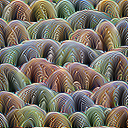

In [19]:
_ = render.render_vis(inceptionv1_model, "mixed4a:213", show_inline=True)

100%|██████████| 512/512 [00:35<00:00, 14.28it/s]



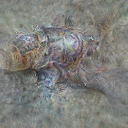

In [20]:
# We can try to optimize for "strawberry" which has label ID 229 for this model
_ = render.render_vis(inceptionv1_model, "labels:219", show_inline=True)

100%|██████████| 512/512 [00:23<00:00, 22.25it/s]



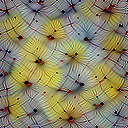

In [21]:
_ = render.render_vis(inceptionv1_model, "mixed4a:107", show_inline=True)

100%|██████████| 512/512 [00:37<00:00, 13.68it/s]



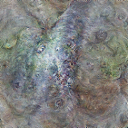

In [22]:
# cucumber
_ = render.render_vis(inceptionv1_model, "labels:743", show_inline=True)

100%|██████████| 512/512 [00:35<00:00, 14.37it/s]



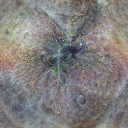

In [23]:
# orange
_ = render.render_vis(inceptionv1_model, "labels:319", show_inline=True)

100%|██████████| 512/512 [00:22<00:00, 22.93it/s]



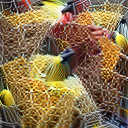

In [24]:
_ = render.render_vis(resnet50_model, "layer4_1_conv1:123", show_inline=True)

100%|██████████| 512/512 [00:19<00:00, 25.88it/s]



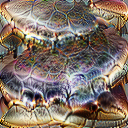

In [25]:
_ = render.render_vis(resnet50_model, "layer4_1_conv1:121", show_inline=True)

100%|██████████| 512/512 [00:24<00:00, 21.25it/s]



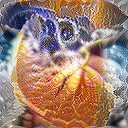

In [26]:
# orange
_ = render.render_vis(resnet50_model, "labels:950", show_inline=True)

100%|██████████| 512/512 [00:26<00:00, 19.20it/s]



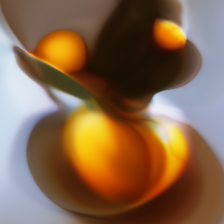

In [27]:
#orange cppn
cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model, "labels:950", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:22<00:00, 22.82it/s]



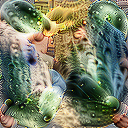

In [28]:
# Try to activate the cucumber, cuke label (943 for usual ImageNet mapping)
_ = render.render_vis(resnet50_model, "labels:943", show_inline=True)

100%|██████████| 512/512 [00:25<00:00, 20.33it/s]



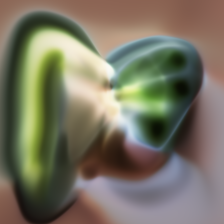

In [29]:
# Try to activate the cucumber, cuke label using CPPN parameterization
cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model, "labels:943", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:21<00:00, 23.84it/s]



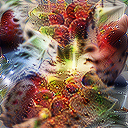

In [30]:
# Try to activate the strawberry label (949 for usual ImageNet mapping)
_ = render.render_vis(resnet50_model, "labels:949", show_inline=True)

100%|██████████| 512/512 [00:23<00:00, 21.61it/s]



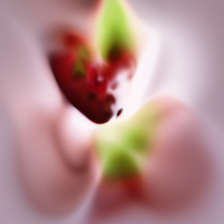

In [31]:
# Try to activate the strawberry label using CPPN parameterization
cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model, "labels:949", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:15<00:00, 32.02it/s]



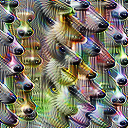

In [32]:
# Try to visualize same channel as above's mixed4a:213
_ = render.render_vis(googlenet_model, "inception4a:213", show_inline=True)

## Try it with other models from `torchvision`!

943 cucumber, cuke

949 strawberry

950 orange

405 airship, dirigible

407 ambulance

430 basketball

在imagenet_label.txt查看全部标签

# my model!

100%|██████████| 512/512 [00:21<00:00, 23.63it/s]



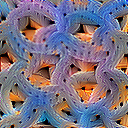

In [40]:
_ = render.render_vis(my_model, "layer4_1_conv1:121", show_inline=True)

100%|██████████| 512/512 [00:21<00:00, 23.86it/s]



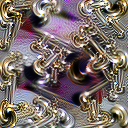

In [41]:
_ = render.render_vis(my_model2, "layer4_1_conv1:121", show_inline=True)

100%|██████████| 512/512 [00:21<00:00, 23.35it/s]



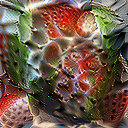

100%|██████████| 512/512 [00:23<00:00, 21.91it/s]



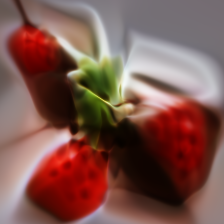

100%|██████████| 512/512 [00:21<00:00, 23.54it/s]



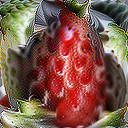

100%|██████████| 512/512 [00:24<00:00, 21.18it/s]



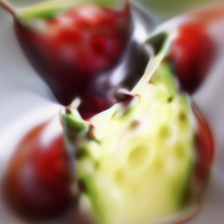

In [33]:
label = "949"
_ = render.render_vis(my_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(my_model2,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model2,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:21<00:00, 23.89it/s]



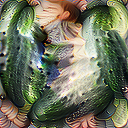

100%|██████████| 512/512 [00:23<00:00, 21.69it/s]



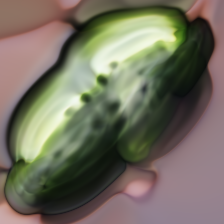

100%|██████████| 512/512 [00:21<00:00, 23.59it/s]



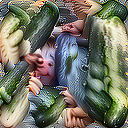

100%|██████████| 512/512 [00:23<00:00, 21.96it/s]



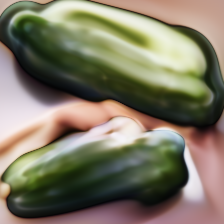

In [34]:
label = "943"
_ = render.render_vis(my_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(my_model2,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model2,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:21<00:00, 23.62it/s]



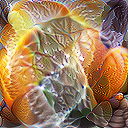

100%|██████████| 512/512 [00:23<00:00, 22.20it/s]



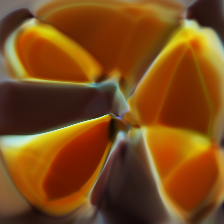

100%|██████████| 512/512 [00:21<00:00, 23.64it/s]



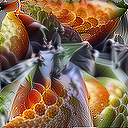

100%|██████████| 512/512 [00:24<00:00, 20.63it/s]



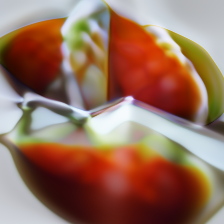

In [35]:
label = "950"
_ = render.render_vis(my_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(my_model2,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model2,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:21<00:00, 23.78it/s]



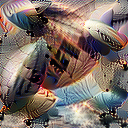

100%|██████████| 512/512 [00:22<00:00, 22.27it/s]



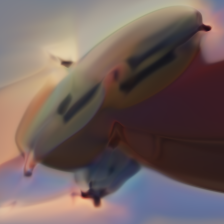

100%|██████████| 512/512 [00:21<00:00, 23.92it/s]



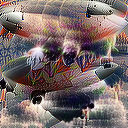

100%|██████████| 512/512 [00:24<00:00, 21.29it/s]



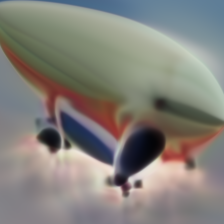

In [36]:
label = "405"
_ = render.render_vis(my_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(my_model2,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model2,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:21<00:00, 23.84it/s]



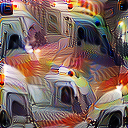

100%|██████████| 512/512 [00:23<00:00, 22.17it/s]



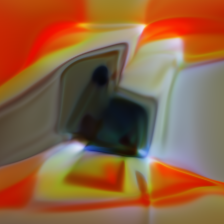

100%|██████████| 512/512 [00:21<00:00, 23.30it/s]



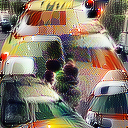

100%|██████████| 512/512 [00:22<00:00, 22.74it/s]



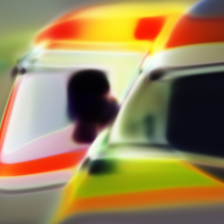

In [37]:
label = "407"
_ = render.render_vis(my_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(my_model2,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model2,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

  0%|          | 0/512 [00:00<?, ?it/s]

100%|██████████| 512/512 [00:22<00:00, 22.90it/s]



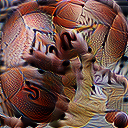

100%|██████████| 512/512 [00:25<00:00, 19.77it/s]



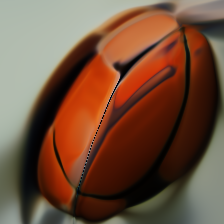

100%|██████████| 512/512 [00:21<00:00, 23.51it/s]



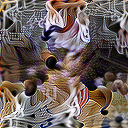

100%|██████████| 512/512 [00:23<00:00, 21.56it/s]



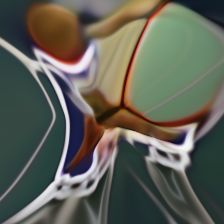

In [39]:
label = "430"
_ = render.render_vis(my_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(my_model2,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(my_model2,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

# Other model

100%|██████████| 512/512 [00:20<00:00, 25.11it/s]



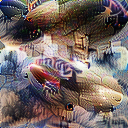

100%|██████████| 512/512 [00:22<00:00, 22.91it/s]



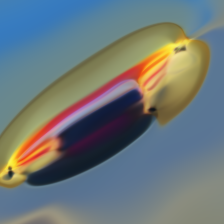

Initial loss: -0.892


100%|█████████▉| 510/512 [00:22<00:00, 20.73it/s]

Loss at step 512: -68.450



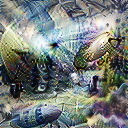

100%|██████████| 512/512 [00:22<00:00, 22.72it/s]



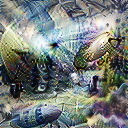

100%|██████████| 512/512 [00:24<00:00, 20.93it/s]



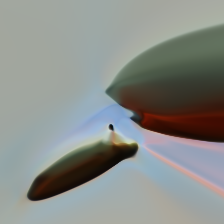

100%|██████████| 512/512 [00:21<00:00, 23.48it/s]



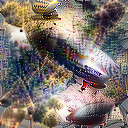

100%|██████████| 512/512 [00:22<00:00, 22.60it/s]



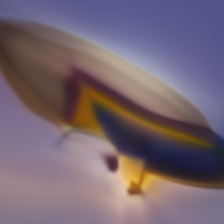

In [42]:
label = "405"

_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", show_inline=True)

_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(googlenet_model,  f"labels:{label}", show_inline=True, verbose=True)

_ = render.render_vis(googlenet_model, f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(resnet50_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:20<00:00, 25.06it/s]



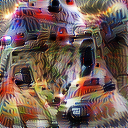

100%|██████████| 512/512 [00:22<00:00, 23.05it/s]



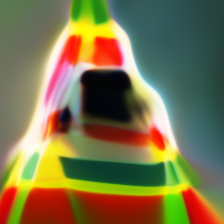

Initial loss: -0.762


100%|█████████▉| 510/512 [00:22<00:00, 20.59it/s]

Loss at step 512: -46.687



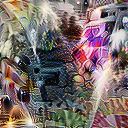

100%|██████████| 512/512 [00:22<00:00, 22.73it/s]



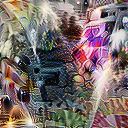

100%|██████████| 512/512 [00:24<00:00, 20.86it/s]



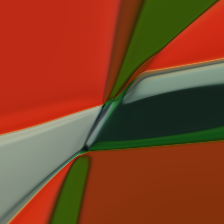

100%|██████████| 512/512 [00:21<00:00, 23.91it/s]



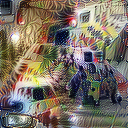

100%|██████████| 512/512 [00:23<00:00, 22.10it/s]



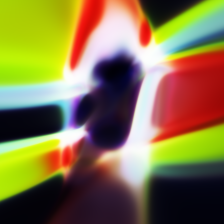

In [43]:
label = "407"

_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", show_inline=True)

_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(googlenet_model,  f"labels:{label}", show_inline=True, verbose=True)

_ = render.render_vis(googlenet_model, f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(resnet50_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:20<00:00, 25.12it/s]



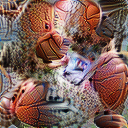

100%|██████████| 512/512 [00:22<00:00, 23.17it/s]



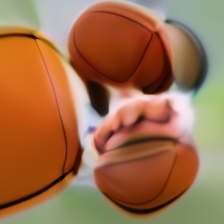

Initial loss: -0.525


100%|█████████▉| 511/512 [00:23<00:00, 22.98it/s]

Loss at step 512: -67.820



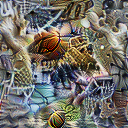

100%|██████████| 512/512 [00:23<00:00, 22.20it/s]



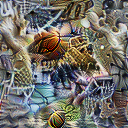

100%|██████████| 512/512 [00:24<00:00, 20.77it/s]



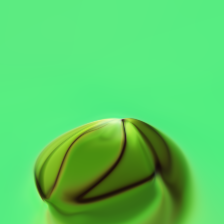

100%|██████████| 512/512 [00:21<00:00, 23.43it/s]



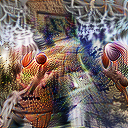

100%|██████████| 512/512 [00:24<00:00, 21.23it/s]



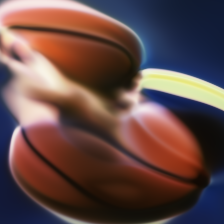

In [44]:
label = "430"

_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", show_inline=True)

_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(googlenet_model,  f"labels:{label}", show_inline=True, verbose=True)

_ = render.render_vis(googlenet_model, f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(resnet50_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)